In [ ]:
pip install patool

     |████████████████████████████████| 81kB 4.5MB/s 


**PRE-PROCESSING**

In [ ]:
#import dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import patoolib
import os
import shutil
import pandas as pd
from glob import glob

Running for dataset 1

In [ ]:
#these are the only variables you need to update.
datafile_name = "completed_1.1"
emotionfile_name = "clip_and_emotion_1"
loadModel = "/content/drive/MyDrive/microX/colored_4microx_fullFace_1and2"
saveModel = "/content/drive/MyDrive/microX/colored_full"
listofMicroX=["nose", "mouth", "rightEye", "leftEye"]

In [ ]:
#find label for each video clip

dataset = "/content/drive/MyDrive/microX/{data}".format(data=datafile_name+".zip")
csvFile = "/content/drive/MyDrive/microX/{label}".format(label=emotionfile_name+".csv")
patoolib.extract_archive(dataset, outdir="/content/Format/")

classes = pd.read_csv(csvFile)
classes.head()

listClips = glob("/content/Format/{data}/*".format(data=datafile_name))
print(listClips)

def labeledClips():
  clipList = []
  for i in listClips:
    # i = /content/Format/completed_split/S009_010
    # splitI = [S009_010,S046_004,....]
    splitI = i.split("/")
    clipList.append(splitI[4])
  labeledDF = classes[classes["Clip Name"].isin(clipList)]
  labeledDF['Emotion Code'] =labeledDF['Emotion Code'].astype(int)
  return labeledDF

labeledDF = labeledClips()
labeledDF.head()

patool: Extracting /content/drive/MyDrive/microX/completed_1.1.zip ...
patool: running /usr/bin/7z x -o/content/Format/ -- /content/drive/MyDrive/microX/completed_1.1.zip
patool: ... /content/drive/MyDrive/microX/completed_1.1.zip extracted to `/content/Format/'.
['/content/Format/completed_1.1/S015_005', '/content/Format/completed_1.1/S058_001', '/content/Format/completed_1.1/S285_001', '/content/Format/completed_1.1/S239_019', '/content/Format/completed_1.1/S244_021', '/content/Format/completed_1.1/S245_001', '/content/Format/completed_1.1/S163_005', '/content/Format/completed_1.1/S220_001', '/content/Format/completed_1.1/S067_001', '/content/Format/completed_1.1/S166_005', '/content/Format/completed_1.1/S174_006', '/content/Format/completed_1.1/S041_001', '/content/Format/completed_1.1/S262_001', '/content/Format/completed_1.1/S044_001', '/content/Format/completed_1.1/S039_003', '/content/Format/completed_1.1/S184_001', '/content/Format/completed_1.1/S167_016', '/content/Format/comp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Clip Name,Emotion Code
1,S002_001,2
2,S002_002,5
3,S003_001,5
4,S004_001,5
5,S005_001,0


In [ ]:
#split into new folder called classes 

def reformatFolders(dataframe):
  clipNameList = dataframe["Clip Name"].tolist()
  EmotionCodeList = dataframe["Emotion Code"].tolist()
  for i in range(len(clipNameList)):
    try:
      clipToMove = "/content/Format/{data}/{clip}".format(data=datafile_name, clip=clipNameList[i])
      pathToMove = "Classes/{emotion}/{clip}".format(emotion=EmotionCodeList[i],clip=clipNameList[i])
      shutil.move(clipToMove,pathToMove)
    except: 
      continue

reformatFolders(labeledDF)

In [ ]:
#getting clip names of each emotion

def clipNameEmotion(emotion):
  clipList = []
  pathName = "/content/Classes/{emotion}/*".format(emotion=emotion)
  listClips = glob(pathName)

  for i in listClips:
    splitClips = i.split("/")
    clipList.append(splitClips[4])
  return clipList

totalClip= []
for i in range(8):
  totalClip.append(clipNameEmotion(i))
print(totalClip)

[['S285_001', 'S167_016', 'S211_012', 'S213_002', 'S238_009', 'S236_002', 'S006_001', 'S170_002', 'S057_012', 'S273_008', 'S101_002', 'S268_004', 'S211_005', 'S211_040', 'S260_002', 'S167_001', 'S113_001', 'S042_001', 'S211_015', 'S273_011', 'S236_011', 'S170_009', 'S025_004', 'S033_001', 'S064_001', 'S165_001', 'S168_003', 'S076_001', 'S181_002', 'S231_001', 'S269_002', 'S032_001', 'S240_002', 'S150_001', 'S174_001', 'S170_013', 'S242_017', 'S163_009', 'S236_003', 'S057_011', 'S042_003', 'S114_001', 'S044_004', 'S242_006', 'S271_013', 'S210_006', 'S200_008', 'S023_002', 'S227_003', 'S270_011', 'S279_002', 'S020_001', 'S244_016', 'S084_010', 'S038_001', 'S053_003', 'S234_001', 'S239_009', 'S138_001', 'S211_019', 'S244_023', 'S032_006', 'S227_002', 'S032_017', 'S243_001', 'S268_005', 'S182_001', 'S238_001', 'S211_020', 'S251_006', 'S226_003', 'S285_002', 'S238_003', 'S126_001', 'S088_004', 'S009_007', 'S042_002', 'S268_002', 'S211_004', 'S286_001', 'S247_001', 'S170_001', 'S065_002', 'S

In [ ]:
#segmentation to utilize more frames

def creating_segments(microx,mode):
  for features in microx:
    for j in range(7):
      emotion=j
      clipList2 = []
      for i in totalClip[emotion]:
        # print(i)
        if(mode==0):
          pathName = "/content/Classes/{emotion}/{clip_no}/{frames}/*".format(emotion=emotion,clip_no = i,frames = i+ "_frame")
        if(mode==1):
          pathName = "/content/Classes/{emotion}/{clip_no}/{frames}/*".format(emotion=emotion,clip_no = i,frames = features)

        listClips = glob(pathName)
        clipList2.append(listClips)
      # print(clipList2)

      resulting_pathname = []
      for i in range(len(clipList2)):
        frame_no= len(clipList2[i])
        rounded_frame_no = frame_no - (frame_no%10)

        # print(frame_no)
        get_clip_name = clipList2[i][0]
        get_clip_name = get_clip_name.split("/")
        get_clip_name = get_clip_name[4]
        some_list= []
        for j in range(min(rounded_frame_no,40)):
          if(mode==0):
            pathname = "/content/Classes/{emotion}/{clip_no}/{naming}/{frames}".format(emotion=emotion,clip_no = get_clip_name,naming= get_clip_name + "_frame",frames = get_clip_name + "_frame" + str(j) + ".jpg")
          if(mode==1):
            pathname = "/content/Classes/{emotion}/{clip_no}/{naming}/{frames}".format(emotion=emotion,clip_no = get_clip_name,naming= features ,frames = features+ get_clip_name + "_frame" + str(j) + ".jpg")

          some_list.append(pathname)  
        resulting_pathname.append(some_list)
      # print(resulting_pathname)

      segmented_frames = []
      for x in range(len(resulting_pathname)):
        my_list = resulting_pathname[x]
        composite_list = [my_list[x:x+10] for x in range(0, len(my_list),10)]
        segmented_frames.append(composite_list)
      # print(segmented_frames)
      #OUTPUT: [vid1[[batch1],[batch2],[..]],[[],[],[]]]

      clipNo = 0
      frameNo = 0
      for m in segmented_frames:
        for m2 in m:
          if(mode==1):
            path = "Segments/{emotion}/{microx}/{clip}".format(emotion=emotion,clip=clipNo,microx= features)
          if(mode==0):
            path = "Segments/{emotion}/{microx}/{clip}".format(emotion=emotion,clip=clipNo,microx= "fullFace")

          os.makedirs(path, exist_ok=True)
          for m3 in m2:
            clipToMove = m3
            if(mode==0):
              pathToMove = "Segments/{emotion}/{microx}/{clip}/{frame}.jpg".format(emotion=emotion,microx =  "fullFace", clip=clipNo,frame=str(clipNo)+"frame"+str(frameNo))
            if(mode==1):
              pathToMove = "Segments/{emotion}/{microx}/{clip}/{frame}.jpg".format(emotion=emotion,microx = features, clip=clipNo,frame=str(clipNo)+"frame"+str(frameNo))
            frameNo += 1
            # print(clipToMove,pathToMove)
            shutil.move(clipToMove,pathToMove)

          frameNo = 0
          clipNo += 1

creating_segments(listofMicroX,1)
creating_segments(["fullface"],0)

Running for dataset 2 

*   Remember to change the name of Folder for Classes and Format First

*   Skip this block if not combining more dataset






In [11]:
#these are the only variables you need to update.
datafile_name = "completed_2.1"
emotionfile_name = "clip_and_emotion_2"

In [12]:
dataset = "/content/drive/MyDrive/microX/{data}".format(data=datafile_name+".zip")
csvFile = "/content/drive/MyDrive/microX/{label}".format(label=emotionfile_name+".csv")
patoolib.extract_archive(dataset, outdir="/content/Format/")

classes = pd.read_csv(csvFile)
classes.head()

listClips = glob("/content/Format/{data}/*".format(data=datafile_name))
print(listClips)

def labeledClips():
  clipList = []
  for i in listClips:
    # i = /content/Format/completed_split/S009_010
    # splitI = [S009_010,S046_004,....]
    splitI = i.split("/")
    clipList.append(splitI[4])
  labeledDF = classes[classes["Clip Name"].isin(clipList)]
  labeledDF['Emotion Code'] =labeledDF['Emotion Code'].astype(int)
  return labeledDF
    

labeledDF = labeledClips()
labeledDF.head()

patool: Extracting /content/drive/MyDrive/microX/completed_2.1.zip ...
patool: running /usr/bin/7z x -o/content/Format/ -- /content/drive/MyDrive/microX/completed_2.1.zip
patool: ... /content/drive/MyDrive/microX/completed_2.1.zip extracted to `/content/Format/'.
['/content/Format/completed_2.1/S026_027', '/content/Format/completed_2.1/S014_004', '/content/Format/completed_2.1/S012_009', '/content/Format/completed_2.1/S015_005', '/content/Format/completed_2.1/S022_006', '/content/Format/completed_2.1/S001_002', '/content/Format/completed_2.1/S002_006', '/content/Format/completed_2.1/S006_008', '/content/Format/completed_2.1/S016_006', '/content/Format/completed_2.1/S011_011', '/content/Format/completed_2.1/S028_023', '/content/Format/completed_2.1/S027_007', '/content/Format/completed_2.1/S024_008', '/content/Format/completed_2.1/S026_025', '/content/Format/completed_2.1/S031_006', '/content/Format/completed_2.1/S028_021', '/content/Format/completed_2.1/S031_010', '/content/Format/comp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Clip Name,Emotion Code
0,S001_001,1
1,S001_002,2
2,S001_003,0
3,S001_004,3
4,S002_002,5


In [13]:
#split into new folder called classes 

def reformatFolders(dataframe):
  clipNameList = dataframe["Clip Name"].tolist()
  EmotionCodeList = dataframe["Emotion Code"].tolist()
  for i in range(len(clipNameList)):
    try:
      clipToMove = "/content/Format/{data}/{clip}".format(data=datafile_name, clip=clipNameList[i])
      pathToMove = "Classes/{emotion}/{clip}".format(emotion=EmotionCodeList[i],clip=clipNameList[i])
      shutil.move(clipToMove,pathToMove)
    except: 
      continue

reformatFolders(labeledDF)

In [14]:
#getting clip names of each emotion 

def clipNameEmotion(emotion):
  clipList = []
  pathName = "/content/Classes/{emotion}/*".format(emotion=emotion)
  listClips = glob(pathName)

  for i in listClips:
    splitClips = i.split("/")
    clipList.append(splitClips[4])
  return clipList

totalClip= []
for i in range(8):
  totalClip.append(clipNameEmotion(i))
print(totalClip)

[['S026_027', 'S006_008', 'S027_007', 'S014_009', 'S024_007', 'S012_008', 'S025_009', 'S028_026', 'S003_008', 'S008_014', 'S019_019', 'S030_011', 'S010_008', 'S011_010', 'S029_008', 'S022_009', 'S021_008', 'S007_009', 'S026_028', 'S019_020', 'S031_009', 'S001_003', 'S024_002', 'S023_013'], ['S022_006', 'S016_006', 'S028_021', 'S003_005', 'S007_007', 'S006_005', 'S001_001', 'S008_006', 'S008_007', 'S023_008', 'S028_020', 'S026_019', 'S008_008', 'S031_005', 'S019_014', 'S009_005', 'S024_004', 'S029_005', 'S013_008', 'S002_005', 'S030_008', 'S011_007', 'S018_006', 'S023_007', 'S004_005', 'S019_012', 'S016_005', 'S013_005', 'S013_011', 'S026_018', 'S026_020', 'S014_006', 'S013_006', 'S029_004', 'S008_015', 'S012_005', 'S019_013', 'S027_004', 'S025_006'], ['S015_005', 'S001_002', 'S002_006', 'S031_006', 'S019_015', 'S030_009', 'S011_008', 'S023_010', 'S012_006', 'S021_006', 'S006_006', 'S003_006', 'S014_007', 'S008_010', 'S013_007', 'S031_007', 'S024_005', 'S008_009', 'S007_008', 'S023_009'

In [15]:
#segmentation to utilize more frames

def creating_segments(microx,mode):
  for features in microx:
    for j in range(7):
      emotion=j
      clipList2 = []
      for i in totalClip[emotion]:
        # print(i)
        if(mode==0):
          pathName = "/content/Classes/{emotion}/{clip_no}/{frames}/*".format(emotion=emotion,clip_no = i,frames = i+ "_frame")
        if(mode==1):
          pathName = "/content/Classes/{emotion}/{clip_no}/{frames}/*".format(emotion=emotion,clip_no = i,frames = features)

        listClips = glob(pathName)
        clipList2.append(listClips)
      # print(clipList2)

      resulting_pathname = []
      for i in range(len(clipList2)):
        frame_no= len(clipList2[i])
        rounded_frame_no = frame_no - (frame_no%10)

        # print(frame_no)
        get_clip_name = clipList2[i][0]
        get_clip_name = get_clip_name.split("/")
        get_clip_name = get_clip_name[4]
        some_list= []
        for j in range(min(rounded_frame_no,40)):
          if(mode==0):
            pathname = "/content/Classes/{emotion}/{clip_no}/{naming}/{frames}".format(emotion=emotion,clip_no = get_clip_name,naming= get_clip_name + "_frame",frames = get_clip_name + "_frame" + str(j) + ".jpg")
          if(mode==1):
            pathname = "/content/Classes/{emotion}/{clip_no}/{naming}/{frames}".format(emotion=emotion,clip_no = get_clip_name,naming= features ,frames = features+ get_clip_name + "_frame" + str(j) + ".jpg")

          some_list.append(pathname)  
        resulting_pathname.append(some_list)
      # print(resulting_pathname)

      segmented_frames = []
      for x in range(len(resulting_pathname)):
        my_list = resulting_pathname[x]
        composite_list = [my_list[x:x+10] for x in range(0, len(my_list),10)]
        segmented_frames.append(composite_list)
      # print(segmented_frames)
      #OUTPUT: [vid1[[batch1],[batch2],[..]],[[],[],[]]]

      clipNo = 620
      frameNo = 0
      for m in segmented_frames:
        for m2 in m:
          if(mode==1):
            path = "Segments/{emotion}/{microx}/{clip}".format(emotion=emotion,clip=clipNo,microx= features)
          if(mode==0):
            path = "Segments/{emotion}/{microx}/{clip}".format(emotion=emotion,clip=clipNo,microx= "fullFace")

          os.makedirs(path, exist_ok=True)
          for m3 in m2:
            clipToMove = m3
            if(mode==0):
              pathToMove = "Segments/{emotion}/{microx}/{clip}/{frame}.jpg".format(emotion=emotion,microx =  "fullFace", clip=clipNo,frame=str(clipNo)+"frame"+str(frameNo))
            if(mode==1):
              pathToMove = "Segments/{emotion}/{microx}/{clip}/{frame}.jpg".format(emotion=emotion,microx = features, clip=clipNo,frame=str(clipNo)+"frame"+str(frameNo))
            frameNo += 1
            # print(clipToMove,pathToMove)
            shutil.move(clipToMove,pathToMove)


          frameNo = 0
          clipNo += 1


creating_segments(listofMicroX,1)
creating_segments(["fullface"],0)

In [ ]:
##this is to export segmented data
##replace 1st arg with new name of zip
import shutil
shutil.make_archive('Segments_emotions', 'zip', 'Segments')

'/content/Segments_emotions.zip'

In [17]:
#getting clip names of each emotion from new segmented folder 

def clipNameEmotion(emotion,feature):
  clipList = []
  pathName = "/content/Segments/{emotion}/{microx}/*".format(emotion=emotion,microx=feature)
  listClips = glob(pathName)
  for i in listClips:
    splitClips = i.split("/")
    clipList.append(splitClips[5])
  return clipList

newTotalClip= []
for e in listofMicroX:
  for i in range(7):
    newTotalClip.append(clipNameEmotion(i,e))

In [40]:
#get pixel for each frames sequentially 
#[pixels_frame1,pixels_frame2,...]
#frames_list is pixel of all frames in one vid
import cv2
import numpy as np
img_height , img_width = 60, 60

def unpackPixel(emotion,microExpression,clipName):
  frames_list=[]
  for i in range(10):
    pathName = '/content/Segments/{emotion}/{microx}/{clip}/{filename}.jpg'.format(emotion = emotion, microx=microExpression, clip = clipName  ,  filename = clipName + "frame" + str(i) )
    # frames_list.append(pathName)
    img= cv2.imread(pathName)
    # norm_img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    if(microExpression=="fullFace"):
      img = cv2.resize(img, (img_height, img_width))

    frames_list.append(img)

  return frames_list

def create_data(listOfClipForEmotion,microx):
    X = []
    Y = []
    counter=0
    classes_list=["0","1","2","3","4","5","6"]      
    for c in classes_list:
        limit=0
        for f in listOfClipForEmotion[int(c)]: #number of clip 
           limit +=1
           if (limit<400):
            frames = unpackPixel(c,microx,f)
            if len(frames) == 10: 
              X.append(frames)
              counter += 1
              y = [0]*len(classes_list)
              y[classes_list.index(c)] = 1
              Y.append(y)
    print(counter)
    X = np.asarray(X)
    Y = np.asarray(Y)
    return X,Y
 

X_m,Y_m = create_data(newTotalClip,"mouth")
X_re, Y_re = create_data(newTotalClip,"rightEye")
X_le,Y_le = create_data(newTotalClip,"leftEye")
X_n,Y_n = create_data(newTotalClip,"nose")
# X_rb,Y_rb = create_data(newTotalClip,"rightBrow")
# X_lb,Y_lb = create_data(newTotalClip,"leftBrow")


# to add in main frame
X_main, Y_main = create_data(newTotalClip,"fullFace")

2747
2747
2747
2747
2747


In [41]:
from sklearn.model_selection import train_test_split

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, Y_m, test_size=0.20, shuffle=True, random_state=0)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, Y_n, test_size=0.20, shuffle=True, random_state=0)
# X_rb_train, X_rb_test, y_rb_train, y_rb_test = train_test_split(X_rb, Y_rb, test_size=0.20, shuffle=True, random_state=0)
# X_lb_train, X_lb_test, y_lb_train, y_lb_test = train_test_split(X_lb, Y_lb, test_size=0.20, shuffle=True, random_state=0)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_re, Y_re, test_size=0.20, shuffle=True, random_state=0)
X_le_train, X_le_test, y_le_train, y_le_test = train_test_split(X_le, Y_le, test_size=0.20, shuffle=True, random_state=0)
X_main_train, X_main_test, y_main_train, y_main_test = train_test_split(X_main, Y_main, test_size=0.20, shuffle=True, random_state=0)

In [42]:
print(X_m_train.shape)
print(y_m_train.shape)
print(X_n_train.shape)
print(y_n_train.shape)
# print(X_rb_train.shape)
# print(y_rb_train.shape)

(2197, 10, 60, 60, 3)
(2197, 7)
(2197, 10, 60, 60, 3)
(2197, 7)


In [43]:
#print sample input and output
print(y_m_train)
print(X_m_train)

[[0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
[[[[[129 147 208]
    [124 142 203]
    [125 143 202]
    ...
    [ 89  99 163]
    [ 75  86 148]
    [ 75  86 148]]

   [[128 146 207]
    [124 142 203]
    [125 143 202]
    ...
    [ 91 101 165]
    [ 76  87 149]
    [ 72  83 145]]

   [[127 145 206]
    [124 142 203]
    [126 144 203]
    ...
    [ 94 104 168]
    [ 80  89 152]
    [ 71  80 143]]

   ...

   [[110 134 194]
    [112 136 196]
    [117 143 203]
    ...
    [ 89 108 159]
    [ 87 102 151]
    [ 86 102 149]]

   [[110 134 192]
    [112 136 194]
    [116 142 202]
    ...
    [ 86 105 156]
    [ 85 100 149]
    [ 86 102 149]]

   [[111 135 193]
    [112 136 194]
    [115 141 201]
    ...
    [ 84 104 152]
    [ 85 100 149]
    [ 86 102 149]]]


  [[[119 133 192]
    [121 135 194]
    [123 137 196]
    ...
    [ 99 108 172]
    [ 92 101 164]
    [ 79  88 151]]

   [[123 137 196]
    [121 135 194]
    [121

**MODEL**

In [44]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

Sequential model for experimentation and data exploration purposes. This model is not our final model.


In [ ]:
model = Sequential()
model.add(ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last", input_shape = (10, 60, 60, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(7, activation = "softmax"))
 
model.summary()
 
opt = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
 
#replace with desired feature to test
history = model.fit(x = X_le_train, y = y_le_train, epochs=30, batch_size = 16 , shuffle=True, validation_split=0.2)

In [ ]:
model.save(saveModel)

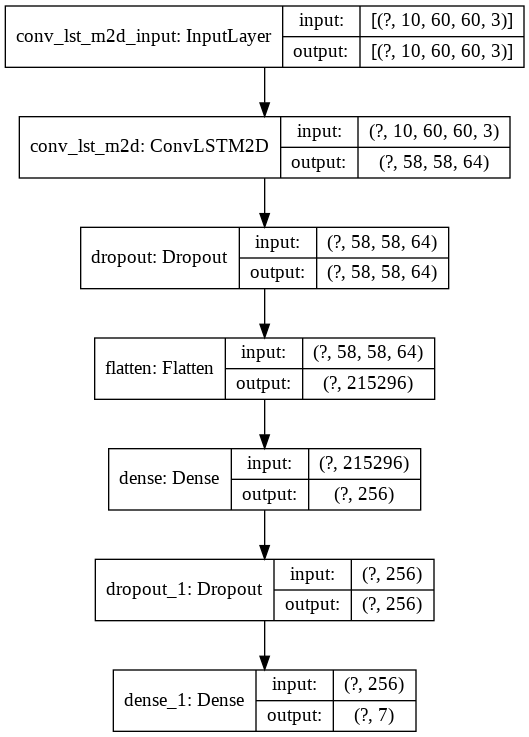

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Run the next two cells to train the model based on a previously saved model. Indicate the folder where the model is saved in variable "savedModel" in the first few blocks above

In [ ]:
loadModel = "/content/drive/MyDrive/microX/colored_4microx_fullFace_1and2_90_epochs"
model = keras.models.load_model(loadModel)
saveModel = "/content/drive/MyDrive/microX/colored_4microx_fullFace_1and2_120_epochs"
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f60482eefd0>>

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
 
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

history = model.fit([X_m_train,X_n_train, X_re_train, X_le_train, X_main_train],y_m_train, epochs=30, batch_size = 8 , shuffle=True, validation_split=0.2, callbacks=callbacks)
model.save(saveModel)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Run below if training model from scratch

In [45]:
from keras.models import Input, Model
from keras.layers import Dense

inputA = Input(shape=(10, 60, 60, 3))
a = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputA)
a = Dropout(0.2)(a)
a = Flatten()(a)
a = Dense(256,activation="relu")(a)
a = Dropout(0.3)(a)
a = Dense(7,activation="softmax")(a)
model1 = Model(inputs=inputA ,outputs=a)

inputB = Input(shape=(10, 60, 60, 3))
b = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputB)
b = Dropout(0.2)(b)
b = Flatten()(b)
b = Dense(256,activation="relu")(b)
b = Dropout(0.3)(b)
b = Dense(7,activation="softmax")(b)
model2 = Model(inputs=inputB ,outputs=b)

inputC = Input(shape=(10, 60, 60, 3))
c = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputC)
c = Dropout(0.2)(c)
c = Flatten()(c)
c = Dense(256,activation="relu")(c)
c = Dropout(0.3)(c)
c = Dense(7,activation="softmax")(c)
model3 = Model(inputs=inputC ,outputs=c)

inputD = Input(shape=(10, 60, 60, 3))
d = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputD)
d = Dropout(0.2)(d)
d = Flatten()(d)
d = Dense(256,activation="relu")(d)
d = Dropout(0.3)(d)
d = Dense(7,activation="softmax")(d)
model4 = Model(inputs=inputD ,outputs=d)

inputE = Input(shape=(10, 60, 60, 3))
e = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputE)
e = Dropout(0.2)(e)
e = Flatten()(e)
e = Dense(256,activation="relu")(e)
e = Dropout(0.3)(e)
e = Dense(7,activation="softmax")(e)
model5 = Model(inputs=inputE ,outputs=e)

# inputF = Input(shape=(10, 60, 60, 3))
# f = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputF)
# f = Dropout(0.2)(f)
# f = Flatten()(f)
# f = Dense(256,activation="relu")(f)
# f = Dropout(0.3)(f)
# f = Dense(7,activation="softmax")(f)
# model6 = Model(inputs=inputF ,outputs=f)

combined = concatenate([model1.output, model2.output, model3.output, model4.output, model5.output])
# z = Dense(256, activation="relu")(combined)
z = Dense(7, activation="softmax")(combined)
model= Model(inputs=[model1.input, model2.input, model3.input, model4.input, model5.input],outputs=z)
# model = keras.models.load_model(savedModel)

opt = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
 
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]
 
history = model.fit([X_m_train,X_n_train, X_re_train, X_le_train, X_main_train],y_m_train, epochs=30, batch_size = 4 , shuffle=True, validation_split=0.2, callbacks=callbacks)


Epoch 1/30
440/440 [==============================] - 197s 447ms/step - loss: 1.9511 - accuracy: 0.1571 - val_loss: 1.9453 - val_accuracy: 0.1886
Epoch 2/30
440/440 [==============================] - 199s 452ms/step - loss: 1.9279 - accuracy: 0.1929 - val_loss: 1.9347 - val_accuracy: 0.2068
Epoch 3/30
440/440 [==============================] - 200s 455ms/step - loss: 1.9097 - accuracy: 0.2140 - val_loss: 1.9428 - val_accuracy: 0.1568
Epoch 4/30
440/440 [==============================] - 200s 454ms/step - loss: 1.9046 - accuracy: 0.2168 - val_loss: 1.9192 - val_accuracy: 0.2091
Epoch 5/30
440/440 [==============================] - 199s 453ms/step - loss: 1.9021 - accuracy: 0.2339 - val_loss: 1.9026 - val_accuracy: 0.2545
Epoch 6/30
440/440 [==============================] - 199s 453ms/step - loss: 1.8897 - accuracy: 0.2385 - val_loss: 1.9467 - val_accuracy: 0.1909
Epoch 7/30
440/440 [==============================] - 200s 455ms/step - loss: 1.8910 - accuracy: 0.2334 - val_loss: 1.9085 -

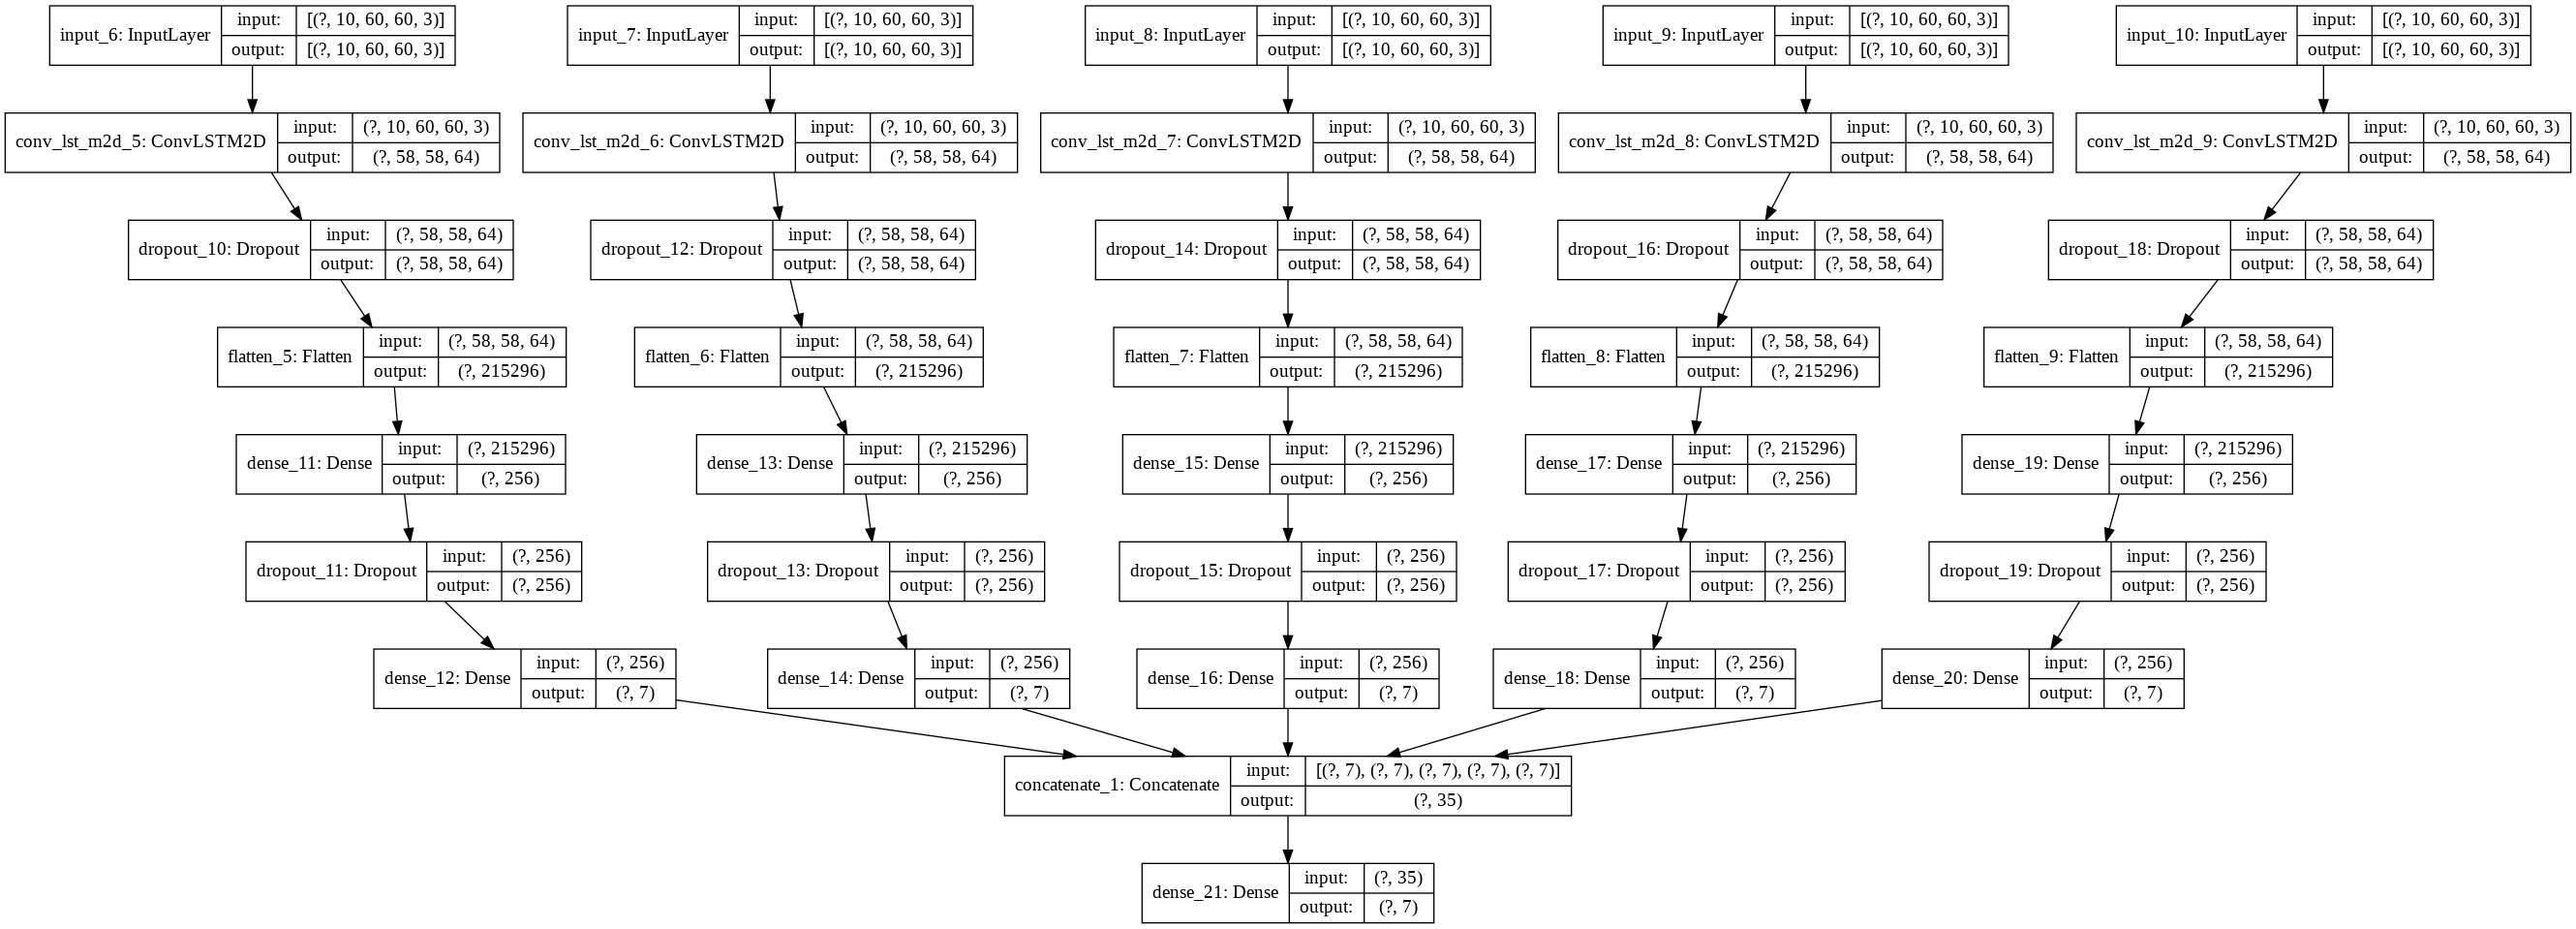

In [46]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

**DATA VISUALISATION**

In [47]:
pred = model.predict([X_m_test,X_n_test, X_re_test, X_le_test, X_main_test])
print(pred)

[[0.14077735 0.18238685 0.09714843 ... 0.05769998 0.19848658 0.23118697]
 [0.12249295 0.1315507  0.10067819 ... 0.30031613 0.15677942 0.06475021]
 [0.08278579 0.20652102 0.21867456 ... 0.09916145 0.10495794 0.10269094]
 ...
 [0.12167779 0.12190038 0.07643559 ... 0.3596259  0.12409601 0.06813975]
 [0.15702696 0.13224345 0.09782667 ... 0.06073381 0.29366297 0.16526774]
 [0.12724842 0.11882976 0.05575617 ... 0.38407943 0.09156717 0.07222641]]


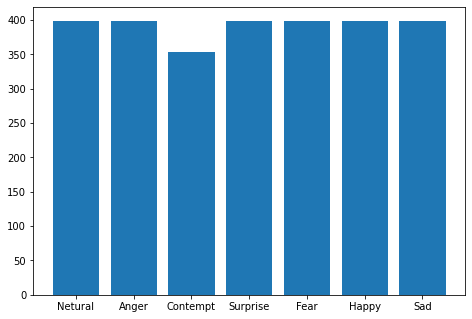

In [48]:
#check if data equally distributed
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# y_m['emotion'].value_counts().plot(kind='bar')
# plt.show()
import numpy as np
emotion_counts = Y_m.sum(axis=0)
emotionlabels = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
ax.bar(emotionlabels,emotion_counts)
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='x', colors='white')
plt.show()

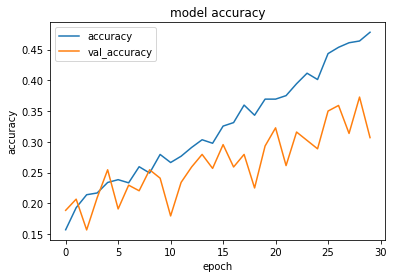

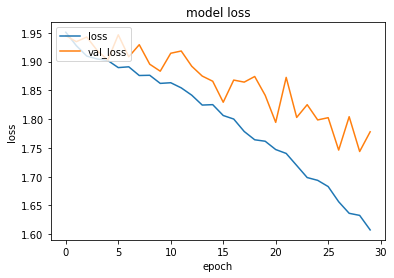

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [50]:
#output array with emotion
def predictedEmotion(possibleEmotion):
  emotionOutput = []
  for i in possibleEmotion:
    likelyEmotion = np.argmax(i)
    emotionOutput.append(likelyEmotion)
  return np.array(emotionOutput)

predictedEmotionArray = predictedEmotion(pred)
print(predictedEmotionArray)

[6 4 2 6 4 1 2 1 5 4 5 5 1 1 5 2 3 2 5 1 4 1 1 2 4 0 1 1 4 5 1 5 4 5 6 1 1
 1 1 2 1 2 2 6 5 5 1 1 5 2 2 1 1 2 2 5 4 4 6 5 3 4 1 5 5 5 4 4 4 1 5 2 4 0
 2 0 1 3 4 5 5 5 2 4 4 4 2 5 4 1 5 5 4 5 1 1 1 4 5 1 0 1 4 5 1 1 1 5 1 5 6
 0 5 5 4 4 5 1 1 6 5 5 5 1 1 1 5 1 1 1 4 1 5 1 1 4 1 4 1 6 5 1 1 0 4 5 4 5
 4 6 2 1 1 5 0 5 5 5 4 4 6 3 5 5 1 3 5 5 3 5 2 4 0 5 4 1 5 1 4 3 5 1 3 3 1
 6 4 4 1 1 1 1 1 4 5 5 2 5 5 1 5 5 1 4 3 5 1 2 5 4 1 4 4 1 1 0 1 1 5 5 0 4
 1 1 1 1 2 4 5 5 2 5 5 1 4 6 5 5 5 4 1 5 4 1 3 5 5 5 1 5 4 3 5 5 1 4 4 5 0
 5 1 4 1 2 0 2 2 1 5 1 4 5 5 5 1 2 2 1 5 1 4 1 5 5 5 1 1 1 1 5 4 1 3 1 6 1
 1 1 1 1 3 5 4 0 5 1 1 1 1 4 5 5 5 1 3 4 5 6 4 5 1 1 4 5 1 4 4 4 1 4 4 1 1
 1 2 2 3 5 1 5 1 5 1 2 5 4 2 4 4 1 1 1 6 6 1 1 1 1 5 5 5 1 5 4 5 5 4 5 1 5
 5 1 1 4 3 3 1 5 1 5 1 5 5 4 4 3 0 0 3 1 5 0 2 1 5 1 1 4 4 5 1 2 1 5 1 5 4
 1 3 5 5 1 2 4 6 6 1 4 5 3 5 5 4 4 2 4 4 3 4 4 2 5 1 1 1 5 5 1 4 5 5 1 2 1
 5 4 1 6 4 4 5 1 3 6 2 4 4 4 4 5 5 1 3 1 2 1 1 1 5 5 2 4 3 4 3 5 1 4 5 5 2
 5 5 1 1 1 4 5 1 5 1 3 2 

[6 4 6 6 2 3 2 0 5 4 4 3 3 5 1 3 5 2 3 0 6 3 0 2 4 0 1 4 3 0 3 6 5 0 6 0 3
 3 0 0 0 2 2 1 5 6 5 4 5 0 5 4 4 6 2 0 1 5 6 5 6 3 1 5 5 5 2 6 2 4 5 2 4 0
 3 0 5 2 4 3 6 5 1 0 0 1 6 1 2 5 5 0 4 4 6 1 4 0 6 6 0 6 2 1 3 1 2 0 4 5 3
 6 3 6 4 0 0 2 0 1 5 3 5 2 1 2 1 3 0 2 3 1 5 6 3 1 0 5 5 6 2 6 1 0 4 6 4 6
 2 2 1 0 3 6 0 6 5 5 4 1 2 0 6 1 6 1 4 0 1 1 2 1 0 3 1 4 5 1 4 3 1 0 3 1 0
 6 1 4 1 4 2 0 3 1 1 2 3 2 1 6 2 5 3 3 1 6 5 6 6 0 4 6 0 1 2 0 5 2 4 5 0 4
 6 1 2 0 2 6 5 3 6 3 5 4 4 1 6 2 6 4 2 6 4 2 3 0 1 0 5 2 4 2 5 6 3 6 4 5 0
 5 1 4 0 2 0 5 2 2 0 0 4 2 4 1 2 3 6 1 1 0 6 6 6 5 5 6 1 2 2 1 2 0 4 1 4 4
 1 1 1 2 6 2 1 0 2 1 2 5 2 5 2 2 5 0 2 4 6 3 6 6 1 1 4 3 5 0 4 1 5 4 4 0 1
 0 2 3 6 1 5 1 2 3 1 2 6 4 3 0 4 1 1 3 2 6 6 4 1 0 2 4 0 1 0 4 6 4 6 5 3 5
 1 1 4 5 4 2 0 6 3 5 2 5 0 3 4 3 4 0 1 6 5 0 2 1 5 3 3 4 5 5 2 2 0 1 4 6 5
 3 5 5 1 6 3 4 4 6 5 4 4 1 5 2 4 6 2 4 4 1 2 4 6 5 0 5 6 3 0 1 0 1 5 5 2 1
 3 1 0 6 2 1 2 1 6 6 1 6 4 2 4 2 6 6 6 3 3 3 0 4 5 1 2 0 3 3 3 0 3 1 6 1 6
 5 6 2 2 1 1 0 4 6 2 5 3 

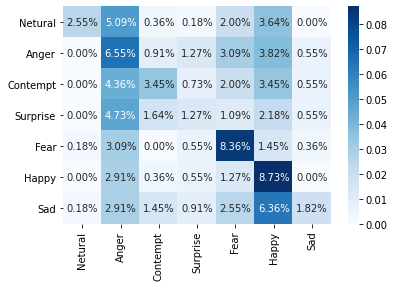

In [51]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
print(predictedEmotion(y_m_test))
cf_matrix = confusion_matrix(predictedEmotion(y_m_test), predictedEmotionArray)
sns.heatmap(cf_matrix/np.sum(cf_matrix), xticklabels=labels, yticklabels=labels, annot=True, 
            fmt='.2%', cmap='Blues')

In [52]:
from sklearn.metrics import multilabel_confusion_matrix

cf_matrix2 = multilabel_confusion_matrix(predictedEmotion(y_m_test), predictedEmotionArray)
print(cf_matrix2)

[[[472   2]
  [ 62  14]]

 [[334 127]
  [ 53  36]]

 [[444  26]
  [ 61  19]]

 [[464  23]
  [ 56   7]]

 [[407  66]
  [ 31  46]]

 [[359 115]
  [ 28  48]]

 [[450  11]
  [ 79  10]]]


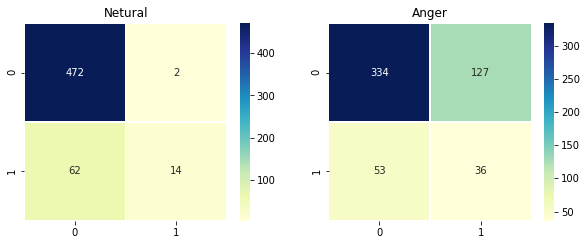

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2,2,2)

# plt.title('Neutral Confusion Matrix',fontsize=5)
ax1.title.set_text('Netural')
df_cm_Neutral = pd.DataFrame(cf_matrix2[0], range(2), range(2))
sns.heatmap(df_cm_Neutral, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu",ax=ax1) # font size

ax2.title.set_text('Anger')
df_cm_Happy = pd.DataFrame(cf_matrix2[1], range(2), range(2))
sns.heatmap(df_cm_Happy, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu",ax=ax2) # font size
plt.show()


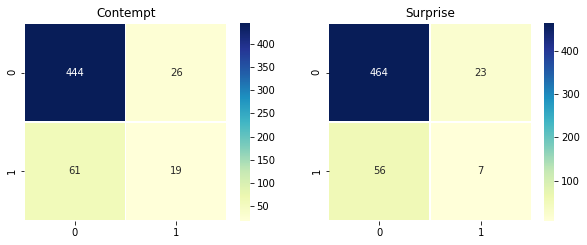

In [54]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2,2,2)
ax1.title.set_text('Contempt')
df_cm_Contempt = pd.DataFrame(cf_matrix2[2], range(2), range(2))
sns.heatmap(df_cm_Contempt, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu",ax=ax1) # font size

ax2.title.set_text('Surprise')
df_cm_Surprise = pd.DataFrame(cf_matrix2[3], range(2), range(2))
sns.heatmap(df_cm_Surprise, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu",ax=ax2) # font size

plt.show()

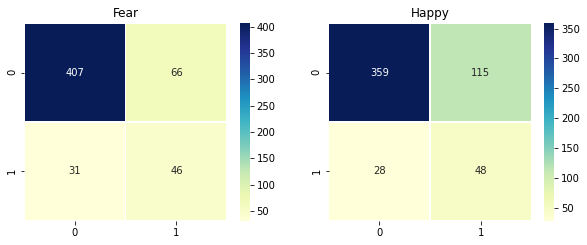

In [55]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2,2,2)
ax1.title.set_text('Fear')
df_cm_fear = pd.DataFrame(cf_matrix2[4], range(2), range(2))
sns.heatmap(df_cm_fear, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu",ax=ax1) # font size

ax2.title.set_text('Happy')
df_cm_happy = pd.DataFrame(cf_matrix2[5], range(2), range(2))
sns.heatmap(df_cm_happy, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu",ax=ax2) # font size

plt.show()

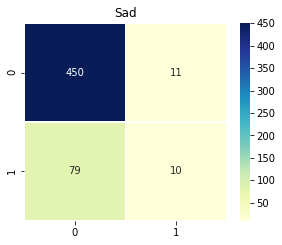

In [56]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.title.set_text('Sad')
df_cm_sad = pd.DataFrame(cf_matrix2[6], range(2), range(2))
sns.heatmap(df_cm_sad, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu",ax=ax1) # font size

plt.show()

In [57]:
#split data into individual emotions, show the next highest emotion

def groupByEmotion(predictedEmotion,emo):
  eList = []
  for i in range(len(predictedEmotion)):
    if predictedEmotion[i] == emo :
      eList.append(pred[i])
  return eList

def secondHighestEmotion(emotionList):
  secondEmotion = [] 
  for i in emotionList:
    list1 = i.tolist()
    x = sorted(list1)[-2]
    secondEmotion.append(list1.index(x))
  return secondEmotion

def emotionName(codedEmotion):
  newList= []
  labels = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
  for i in codedEmotion:
    newList.append(labels[i])
  return newList

Neutral = groupByEmotion(predictedEmotionArray,0)
NeutralCorr = emotionName(secondHighestEmotion(Neutral))

anger = groupByEmotion(predictedEmotionArray,1)
angerCorr = emotionName(secondHighestEmotion(anger))

contempt = groupByEmotion(predictedEmotionArray,2)
contemptCorr = emotionName(secondHighestEmotion(contempt))

surprise = groupByEmotion(predictedEmotionArray,3)
surpriseCorr = emotionName(secondHighestEmotion(surprise))

fear = groupByEmotion(predictedEmotionArray,4)
fearCorr = emotionName(secondHighestEmotion(fear))

happy = groupByEmotion(predictedEmotionArray,5)
happyCorr = emotionName(secondHighestEmotion(happy))

sad = groupByEmotion(predictedEmotionArray,6)
sadCorr = emotionName(secondHighestEmotion(sad))

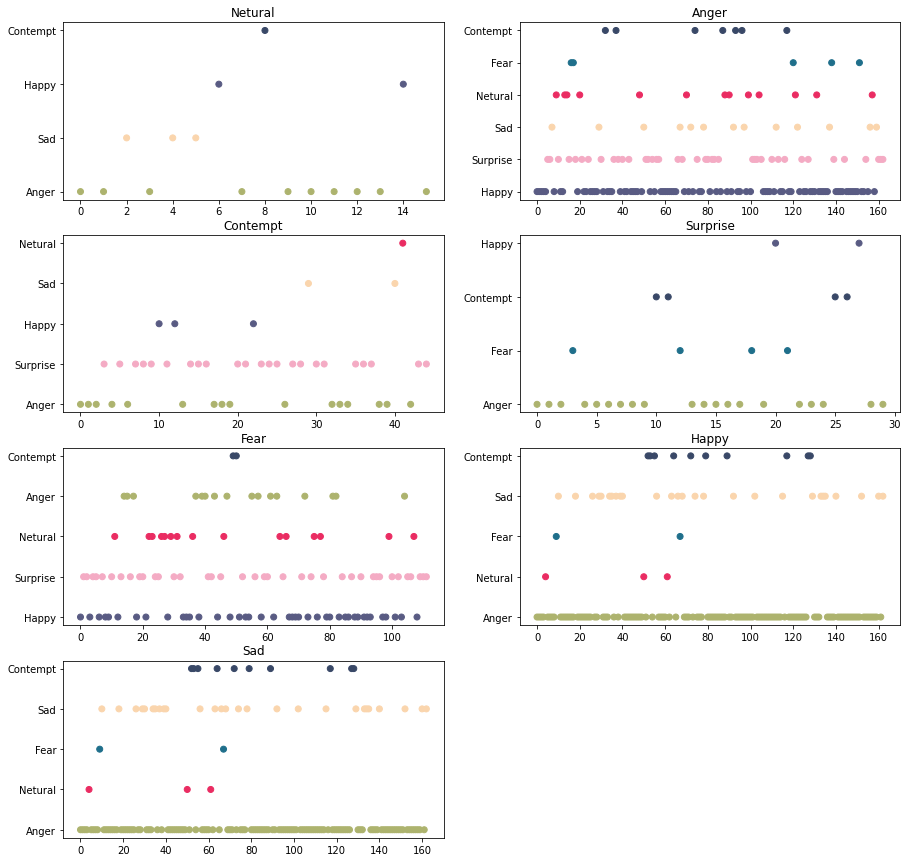

In [58]:
Expressions = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(4, 2, 1)
ax1 = fig.add_subplot(4, 2, 2)
ax2 = fig.add_subplot(4, 2, 3)
ax3 = fig.add_subplot(4, 2, 4)
ax4 = fig.add_subplot(4, 2, 5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)

def color(corr):
  colorList = []
  colors = ['#ea2c62','#adb36e','#394867','#f4abc4','#1f6f8b','#595b83','#fad5ad']
  for i in corr:
    colorList.append(colors[i])
  return colorList

ax.scatter(range(0, len(NeutralCorr)),NeutralCorr,c = color(secondHighestEmotion(Neutral)) )
ax1.scatter(range(0, len(angerCorr)),angerCorr,c = color(secondHighestEmotion(anger)) )
ax2.scatter(range(0, len(contemptCorr)),contemptCorr,c = color(secondHighestEmotion(contempt)) )
ax3.scatter(range(0, len(surpriseCorr)),surpriseCorr,c = color(secondHighestEmotion(surprise)) )
ax4.scatter(range(0, len(fearCorr)),fearCorr,c = color(secondHighestEmotion(fear)) )
ax5.scatter(range(0, len(happyCorr)),happyCorr,c = color(secondHighestEmotion(happy)) )
ax6.scatter(range(0, len(happyCorr)),happyCorr,c = color(secondHighestEmotion(happy)) )

ax.title.set_text('Netural')
ax1.title.set_text('Anger')
ax2.title.set_text('Contempt')
ax3.title.set_text('Surprise')
ax4.title.set_text('Fear')
ax5.title.set_text('Happy')
ax6.title.set_text('Sad')

plt.show()

In [59]:
#recall,precision,F1 score

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(predictedEmotion(y_m_test), predictedEmotionArray)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.875      0.2208589  0.42222222 0.23333333 0.41071429 0.29447853
 0.47619048]
recall: [0.18421053 0.40449438 0.2375     0.11111111 0.5974026  0.63157895
 0.11235955]
fscore: [0.30434783 0.28571429 0.304      0.15053763 0.48677249 0.40167364
 0.18181818]
support: [76 89 80 63 77 76 89]


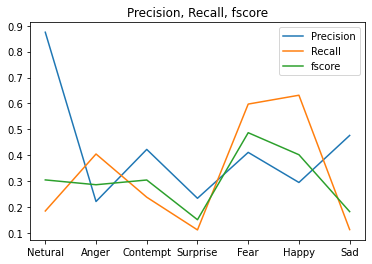

In [60]:
x = np.array([0,1,2,3,4,5,6])

my_xticks = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
plt.xticks(x, my_xticks)

plt.plot(precision)
plt.plot(recall)
plt.plot(fscore)

plt.title('Precision, Recall, fscore')
plt.legend(['Precision', 'Recall' , 'fscore'], loc='upper right')

plt.show()